<a href="https://colab.research.google.com/github/Imirushik/Bank-Marketing-ML/blob/main/Code/Untitled11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

# Load the dataset
file_path = '/content/bank-full.csv'  # Update with your file path in Colab
data = pd.read_csv(file_path, sep=';')  # Use `sep=';'` since the dataset uses semicolons
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
# Basic statistics and info
print(data.info())
print(data.describe())
print(data.isnull().sum())  # Check for missing values
print(data['y'].value_counts())  # Check target class distribution


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
                age        balance           day      duration      campaign  \
count  45211.0

In [3]:
# Assuming there are no missing values; if found, handle them appropriately
# For example:
# data.fillna(data.median(), inplace=True)


In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'y':  # Exclude the target column
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Encode target variable
data['y'] = data['y'].map({'yes': 1, 'no': 0})


In [10]:
from sklearn.model_selection import train_test_split

X = data.drop('y', axis=1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
# Example of feature selection using mutual information
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)  # Adjust based on explained variance
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [15]:
# Import necessary libraries for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Build the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.8457370341700763
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91      7985
           1       0.40      0.66      0.50      1058

    accuracy                           0.85      9043
   macro avg       0.68      0.77      0.71      9043
weighted avg       0.89      0.85      0.86      9043

Confusion Matrix for Random Forest:
 [[6945 1040]
 [ 355  703]]


In [16]:
# Import necessary libraries for Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Build the Neural Network model
model_nn = Sequential()
model_nn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification

# Compile the model
model_nn.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history_nn = model_nn.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8176 - loss: 0.4160 - val_accuracy: 0.8438 - val_loss: 0.4090
Epoch 2/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8399 - loss: 0.3686 - val_accuracy: 0.8333 - val_loss: 0.4188
Epoch 3/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8391 - loss: 0.3664 - val_accuracy: 0.8225 - val_loss: 0.4164
Epoch 4/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8472 - loss: 0.3507 - val_accuracy: 0.8639 - val_loss: 0.3477
Epoch 5/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8483 - loss: 0.3484 - val_accuracy: 0.8523 - val_loss: 0.3749
Epoch 6/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8485 - loss: 0.3498 - val_accuracy: 0.8672 - val_loss: 0.3532
Epoch 7/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8488 - loss: 0.3467 - val_accuracy: 0.8699 - val_loss: 0.3401
Epoch 8/20
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8527 - loss: 0.3405 -

In [17]:
# Neural Network Evaluation
y_pred_nn = (model_nn.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary values
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report for Neural Network:\n", classification_report(y_test, y_pred_nn))
print("Confusion Matrix for Neural Network:\n", confusion_matrix(y_test, y_pred_nn))

# Random Forest Evaluation (already provided in your code above)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_rf))


283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Neural Network Accuracy: 0.8585646356297689
Classification Report for Neural Network:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7985
           1       0.43      0.63      0.51      1058

    accuracy                           0.86      9043
   macro avg       0.69      0.76      0.71      9043
weighted avg       0.89      0.86      0.87      9043

Confusion Matrix for Neural Network:
 [[7096  889]
 [ 390  668]]
Random Forest Accuracy: 0.8457370341700763
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91      7985
           1       0.40      0.66      0.50      1058

    accuracy                           0.85      9043
   macro avg       0.68      0.77      0.71      9043
weighted avg       0.89      0.85      0.86      9043

Confusion Matrix for Random Forest:
 [[6945 1040]
 [ 355  703]]


In [18]:
# Evaluate on training data
y_pred_rf_train = rf_model.predict(X_train)
print("Random Forest Training Accuracy:", accuracy_score(y_train, y_pred_rf_train))

# Evaluate on test data (already computed)
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Training Accuracy: 0.999953032532799
Random Forest Test Accuracy: 0.8457370341700763


In [19]:
from sklearn.feature_selection import SelectFromModel

# Feature selection using the trained Random Forest model
selector = SelectFromModel(rf_model, threshold="mean")  # Select features above mean importance
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

print("Number of features after selection:", X_train_selected.shape[1])

# Retrain the Random Forest model with selected features
rf_model_fs = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_fs.fit(X_train_selected, y_train)

# Evaluate on training data
y_pred_rf_train_fs = rf_model_fs.predict(X_train_selected)
print("Random Forest Training Accuracy after Feature Selection:", accuracy_score(y_train, y_pred_rf_train_fs))

# Evaluate on test data
y_pred_rf_fs = rf_model_fs.predict(X_test_selected)
print("Random Forest Test Accuracy after Feature Selection:", accuracy_score(y_test, y_pred_rf_fs))


Number of features after selection: 3
Random Forest Training Accuracy after Feature Selection: 0.999953032532799
Random Forest Test Accuracy after Feature Selection: 0.8135574477496406


In [20]:
# Simplified Random Forest model
rf_model_simple = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,  # Limit the maximum depth of the trees
    max_features='sqrt',  # Consider a subset of features at each split
    min_samples_split=10,  # Require a minimum of 10 samples to split
    min_samples_leaf=5,  # Require a minimum of 5 samples in a leaf
    random_state=42
)

rf_model_simple.fit(X_train_selected, y_train)

# Evaluate on training data
y_pred_rf_train_simple = rf_model_simple.predict(X_train_selected)
print("Simplified Random Forest Training Accuracy:", accuracy_score(y_train, y_pred_rf_train_simple))

# Evaluate on test data
y_pred_rf_simple = rf_model_simple.predict(X_test_selected)
print("Simplified Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf_simple))


Simplified Random Forest Training Accuracy: 0.8564674202335849
Simplified Random Forest Test Accuracy: 0.7994028530354971


In [21]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the simplified Random Forest model
cv_scores = cross_val_score(rf_model_simple, X_train_selected, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.78575342 0.85589041 0.85510763 0.85761252 0.85689682]
Mean Cross-Validation Accuracy: 0.8422521627682453


In [22]:
import joblib

# Save the simplified Random Forest model
joblib.dump(rf_model_simple, 'simplified_random_forest_model.pkl')


['simplified_random_forest_model.pkl']

In [23]:
# Load the saved model
rf_model_loaded = joblib.load('simplified_random_forest_model.pkl')

# Make predictions with the loaded model
y_pred_rf_loaded = rf_model_loaded.predict(X_test_selected)
print("Loaded Model Test Accuracy:", accuracy_score(y_test, y_pred_rf_loaded))


Loaded Model Test Accuracy: 0.7994028530354971


In [24]:
# Evaluate on training data for the feature-selected model
y_pred_rf_train_fs = rf_model_fs.predict(X_train_selected)
print("Feature-Selected Random Forest Training Accuracy:", accuracy_score(y_train, y_pred_rf_train_fs))

# Evaluate on test data for the feature-selected model
y_pred_rf_fs = rf_model_fs.predict(X_test_selected)
print("Feature-Selected Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf_fs))


# Evaluate on training data for the simplified model
y_pred_rf_train_simple = rf_model_simple.predict(X_train_selected)
print("Simplified Random Forest Training Accuracy:", accuracy_score(y_train, y_pred_rf_train_simple))

# Evaluate on test data for the simplified model
y_pred_rf_simple = rf_model_simple.predict(X_test_selected)
print("Simplified Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf_simple))


Feature-Selected Random Forest Training Accuracy: 0.999953032532799
Feature-Selected Random Forest Test Accuracy: 0.8135574477496406
Simplified Random Forest Training Accuracy: 0.8564674202335849
Simplified Random Forest Test Accuracy: 0.7994028530354971


In [25]:
# Save Random Forest model
import joblib
# Save Neural Network model
model_nn.save('neural_network_model.h5')

In [26]:
# Load Random Forest model
rf_model_loaded = joblib.load('simplified_random_forest_model.pkl')

# Load Neural Network model
from keras.models import load_model
model_nn_loaded = load_model('neural_network_model.h5')


In [ ]:
# Random Forest predictions
y_pred_rf_loaded = rf_model_loaded.predict(X_test)
print("Loaded Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_loaded))

# Neural Network predictions
y_pred_nn_loaded = (model_nn_loaded.predict(X_test) > 0.5).astype("int32")
print("Loaded Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn_loaded))


Loaded Random Forest Accuracy: 0.8457370341700763
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Loaded Neural Network Accuracy: 0.8613292049098751


In [28]:
# Random Forest predictions for the simplified model
y_pred_rf_loaded_simple = rf_model_loaded.predict(X_test_selected)
print("Loaded Simplified Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf_loaded_simple))

# Neural Network predictions
y_pred_nn_loaded = (model_nn_loaded.predict(X_test) > 0.5).astype("int32")
print("Loaded Neural Network Test Accuracy:", accuracy_score(y_test, y_pred_nn_loaded))


Loaded Simplified Random Forest Test Accuracy: 0.7994028530354971
283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Loaded Neural Network Test Accuracy: 0.8585646356297689


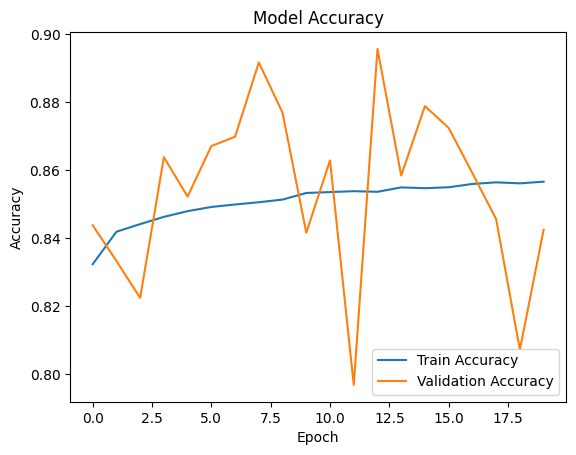

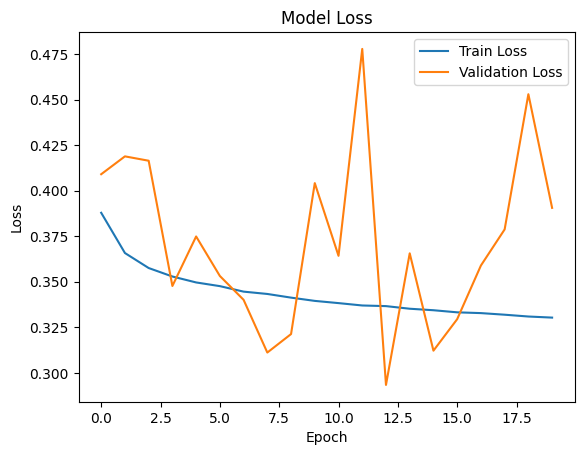

In [29]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history_nn.history['accuracy'], label='Train Accuracy')
plt.plot(history_nn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Plot loss
plt.plot(history_nn.history['loss'], label='Train Loss')
plt.plot(history_nn.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()
